<a href="https://colab.research.google.com/github/SanjayBista1010/Classification/blob/main/adultIncomeClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [141]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [142]:
df['workclass'].value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


In [143]:
df = df.replace('?', np.nan)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [145]:
df['income'].value_counts()

,count
income,
<=50K,37155
>50K,11687


In [146]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col] = df[col].fillna(df[col].mode()[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


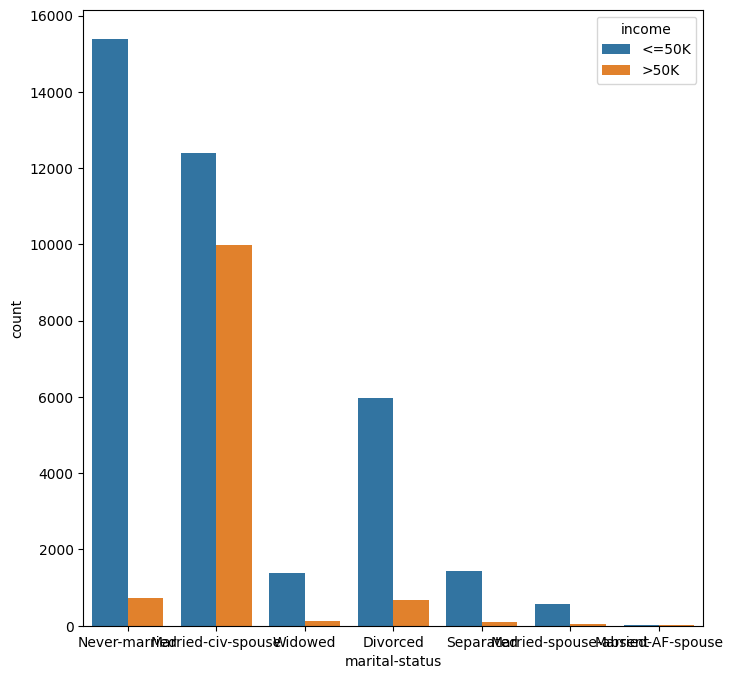

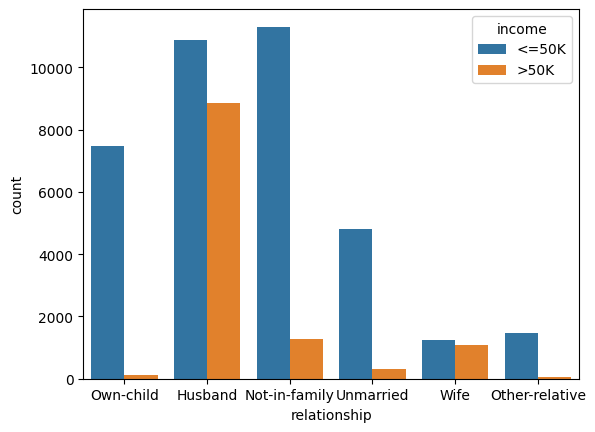

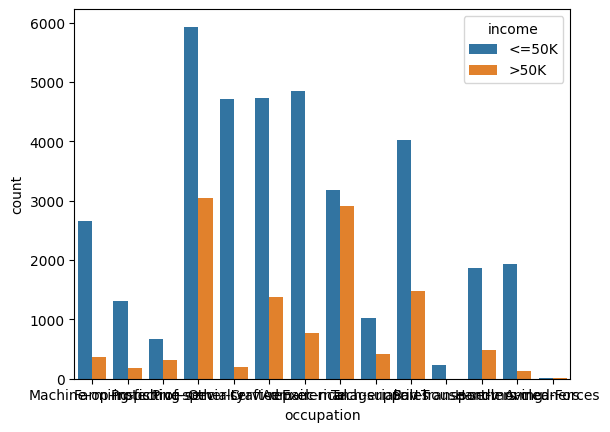

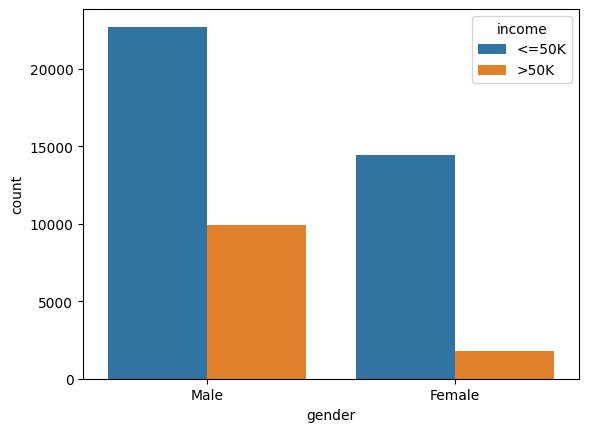

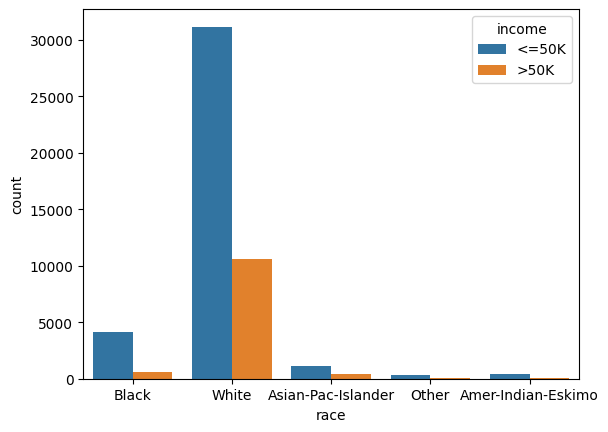

In [147]:
plt.figure(figsize=(8,8))
sns.countplot(data=df, x='marital-status', hue='income')
plt.show()

sns.countplot(data=df, x='relationship', hue='income')
plt.show()

sns.countplot(data=df, x='occupation', hue='income')
plt.show()

sns.countplot(data=df, x='gender', hue='income')
plt.show()

sns.countplot(data=df, x='race', hue='income')
plt.show()

In [148]:
df['workclass'].unique()

array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [149]:
workclass_mapping = {
    'Never-worked': 0,
    'Without-pay': 1,
    'Self-emp-not-inc': 2,
    'Self-emp-inc': 3,
    'Private': 4,
    'Local-gov': 5,
    'State-gov': 6,
    'Federal-gov': 7
}

df['workclass'] = df['workclass'].map(workclass_mapping)


In [150]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [151]:
education_mapping = {
    'Preschool': 0,
    '1st-4th': 0,
    '5th-6th': 0,
    '7th-8th': 0,
    '9th': 0,
    '10th': 0,
    '11th': 1,
    '12th': 1,
    'HS-grad': 2,
    'Some-college': 2,
    'Assoc-acdm': 2,
    'Assoc-voc': 2,
    'Bachelors': 3,
    'Masters': 4,
    'Doctorate': 5,
    'Prof-school': 2
}

df['education'] = df['education'].map(education_mapping)

In [152]:
df['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [153]:
mapping = {
    'Married-civ-spouse': 'Married',
    'Married-spouse-absent': 'Married',
    'Married-AF-spouse': 'Married',
    'Divorced': 'Divorced',
    'Never-married': 'Unmarried',
    'Separated': 'Unmarried',
    'Widowed': 'Unmarried'
}

df['marital-status'] = df['marital-status'].map(mapping)

In [154]:
df = pd.get_dummies(df, columns=['marital-status','occupation','race','relationship'], dtype=int)

In [155]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [156]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [157]:
df['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [158]:
freq_encoding = df['native-country'].value_counts() / len(df)
df['native-country_freq'] = df['native-country'].map(freq_encoding)

In [159]:
df

,age,workclass,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,native-country,...,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_freq
0,25,4,226802,1,7,0,0,0,40,United-States,...,1,0,0,0,0,0,1,0,0,0.914971
1,38,4,89814,2,9,0,0,0,50,United-States,...,0,0,1,1,0,0,0,0,0,0.914971
2,28,5,336951,2,12,0,0,0,40,United-States,...,0,0,1,1,0,0,0,0,0,0.914971
3,44,4,160323,2,10,0,7688,0,40,United-States,...,1,0,0,1,0,0,0,0,0,0.914971
4,18,4,103497,2,10,1,0,0,30,United-States,...,0,0,1,0,0,0,1,0,0,0.914971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,2,12,1,0,0,38,United-States,...,0,0,1,0,0,0,0,0,1,0.914971
48838,40,4,154374,2,9,0,0,0,40,United-States,...,0,0,1,1,0,0,0,0,0,0.914971
48839,58,4,151910,2,9,1,0,0,40,United-States,...,0,0,1,0,0,0,0,1,0,0.914971
48840,22,4,201490,2,9,0,0,0,20,United-States,...,0,0,1,0,0,0,1,0,0,0.914971


In [160]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           48842 non-null  int64  
 1   workclass                     48842 non-null  int64  
 2   fnlwgt                        48842 non-null  int64  
 3   education                     48842 non-null  int64  
 4   educational-num               48842 non-null  int64  
 5   gender                        48842 non-null  int64  
 6   capital-gain                  48842 non-null  int64  
 7   capital-loss                  48842 non-null  int64  
 8   hours-per-week                48842 non-null  int64  
 9   native-country                48842 non-null  object 
 10  income                        48842 non-null  int64  
 11  marital-status_Divorced       48842 non-null  int64  
 12  marital-status_Married        48842 non-null  int64  
 13  m

In [162]:
encoded_df = df.select_dtypes(include=['int64', 'float64']).copy()
encoded_df

,age,workclass,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,...,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_freq
0,25,4,226802,1,7,0,0,0,40,0,...,1,0,0,0,0,0,1,0,0,0.914971
1,38,4,89814,2,9,0,0,0,50,0,...,0,0,1,1,0,0,0,0,0,0.914971
2,28,5,336951,2,12,0,0,0,40,1,...,0,0,1,1,0,0,0,0,0,0.914971
3,44,4,160323,2,10,0,7688,0,40,1,...,1,0,0,1,0,0,0,0,0,0.914971
4,18,4,103497,2,10,1,0,0,30,0,...,0,0,1,0,0,0,1,0,0,0.914971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,2,12,1,0,0,38,0,...,0,0,1,0,0,0,0,0,1,0.914971
48838,40,4,154374,2,9,0,0,0,40,1,...,0,0,1,1,0,0,0,0,0,0.914971
48839,58,4,151910,2,9,1,0,0,40,0,...,0,0,1,0,0,0,0,1,0,0.914971
48840,22,4,201490,2,9,0,0,0,20,0,...,0,0,1,0,0,0,1,0,0,0.914971


In [163]:
y = encoded_df['income']
y

,income
0,0
1,0
2,1
3,1
4,0
...,...
48837,0
48838,1
48839,0
48840,0


In [164]:
x = encoded_df.drop('income', axis=1)
x

,age,workclass,fnlwgt,education,educational-num,gender,capital-gain,capital-loss,hours-per-week,marital-status_Divorced,...,race_Black,race_Other,race_White,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,native-country_freq
0,25,4,226802,1,7,0,0,0,40,0,...,1,0,0,0,0,0,1,0,0,0.914971
1,38,4,89814,2,9,0,0,0,50,0,...,0,0,1,1,0,0,0,0,0,0.914971
2,28,5,336951,2,12,0,0,0,40,0,...,0,0,1,1,0,0,0,0,0,0.914971
3,44,4,160323,2,10,0,7688,0,40,0,...,1,0,0,1,0,0,0,0,0,0.914971
4,18,4,103497,2,10,1,0,0,30,0,...,0,0,1,0,0,0,1,0,0,0.914971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,4,257302,2,12,1,0,0,38,0,...,0,0,1,0,0,0,0,0,1,0.914971
48838,40,4,154374,2,9,0,0,0,40,0,...,0,0,1,1,0,0,0,0,0,0.914971
48839,58,4,151910,2,9,1,0,0,40,0,...,0,0,1,0,0,0,0,1,0,0.914971
48840,22,4,201490,2,9,0,0,0,20,0,...,0,0,1,0,0,0,1,0,0,0.914971


<Axes: ylabel='age'>

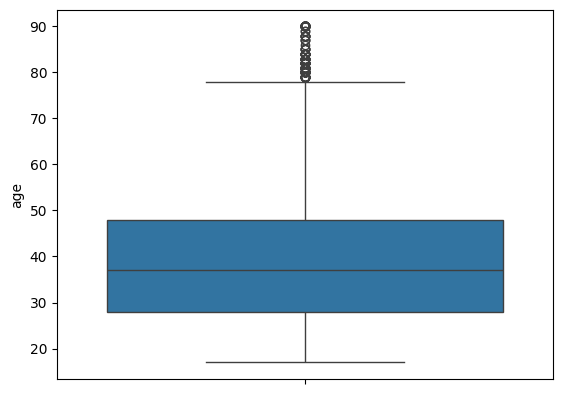

In [165]:
sns.boxplot(encoded_df['age'])

In [166]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((34189, 38), (14653, 38), (34189,), (14653,))

In [167]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[-0.99623881, -0.04271196, -0.00752487, ..., -0.34108512,
         -0.22367546,  0.3056906 ],
        [ 1.84184356, -0.04271196,  0.92050237, ..., -0.34108512,
         -0.22367546,  0.3056906 ],
        [-0.70515344, -0.04271196,  0.60854539, ..., -0.34108512,
         -0.22367546, -3.29303557],
        ...,
        [-0.77792478, -0.04271196,  0.5738172 , ..., -0.34108512,
         -0.22367546,  0.3056906 ],
        [ 0.53195939,  2.12870683, -0.88013477, ...,  2.93181949,
         -0.22367546,  0.3056906 ],
        [ 1.47798685, -0.04271196, -0.12734947, ..., -0.34108512,
         -0.22367546,  0.3056906 ]]),
 array([[ 1.25967282, -0.04271196, -1.48202388, ...,  2.93181949,
         -0.22367546,  0.3056906 ],
        [-0.99623881, -0.04271196, -0.72671874, ..., -0.34108512,
         -0.22367546,  0.3056906 ],
        [ 0.31364536, -0.04271196, -0.18033223, ..., -0.34108512,
         -0.22367546,  0.3056906 ],
        ...,
        [-0.05021135,  3.21441623,  0.23664297, ...,  

<Axes: >

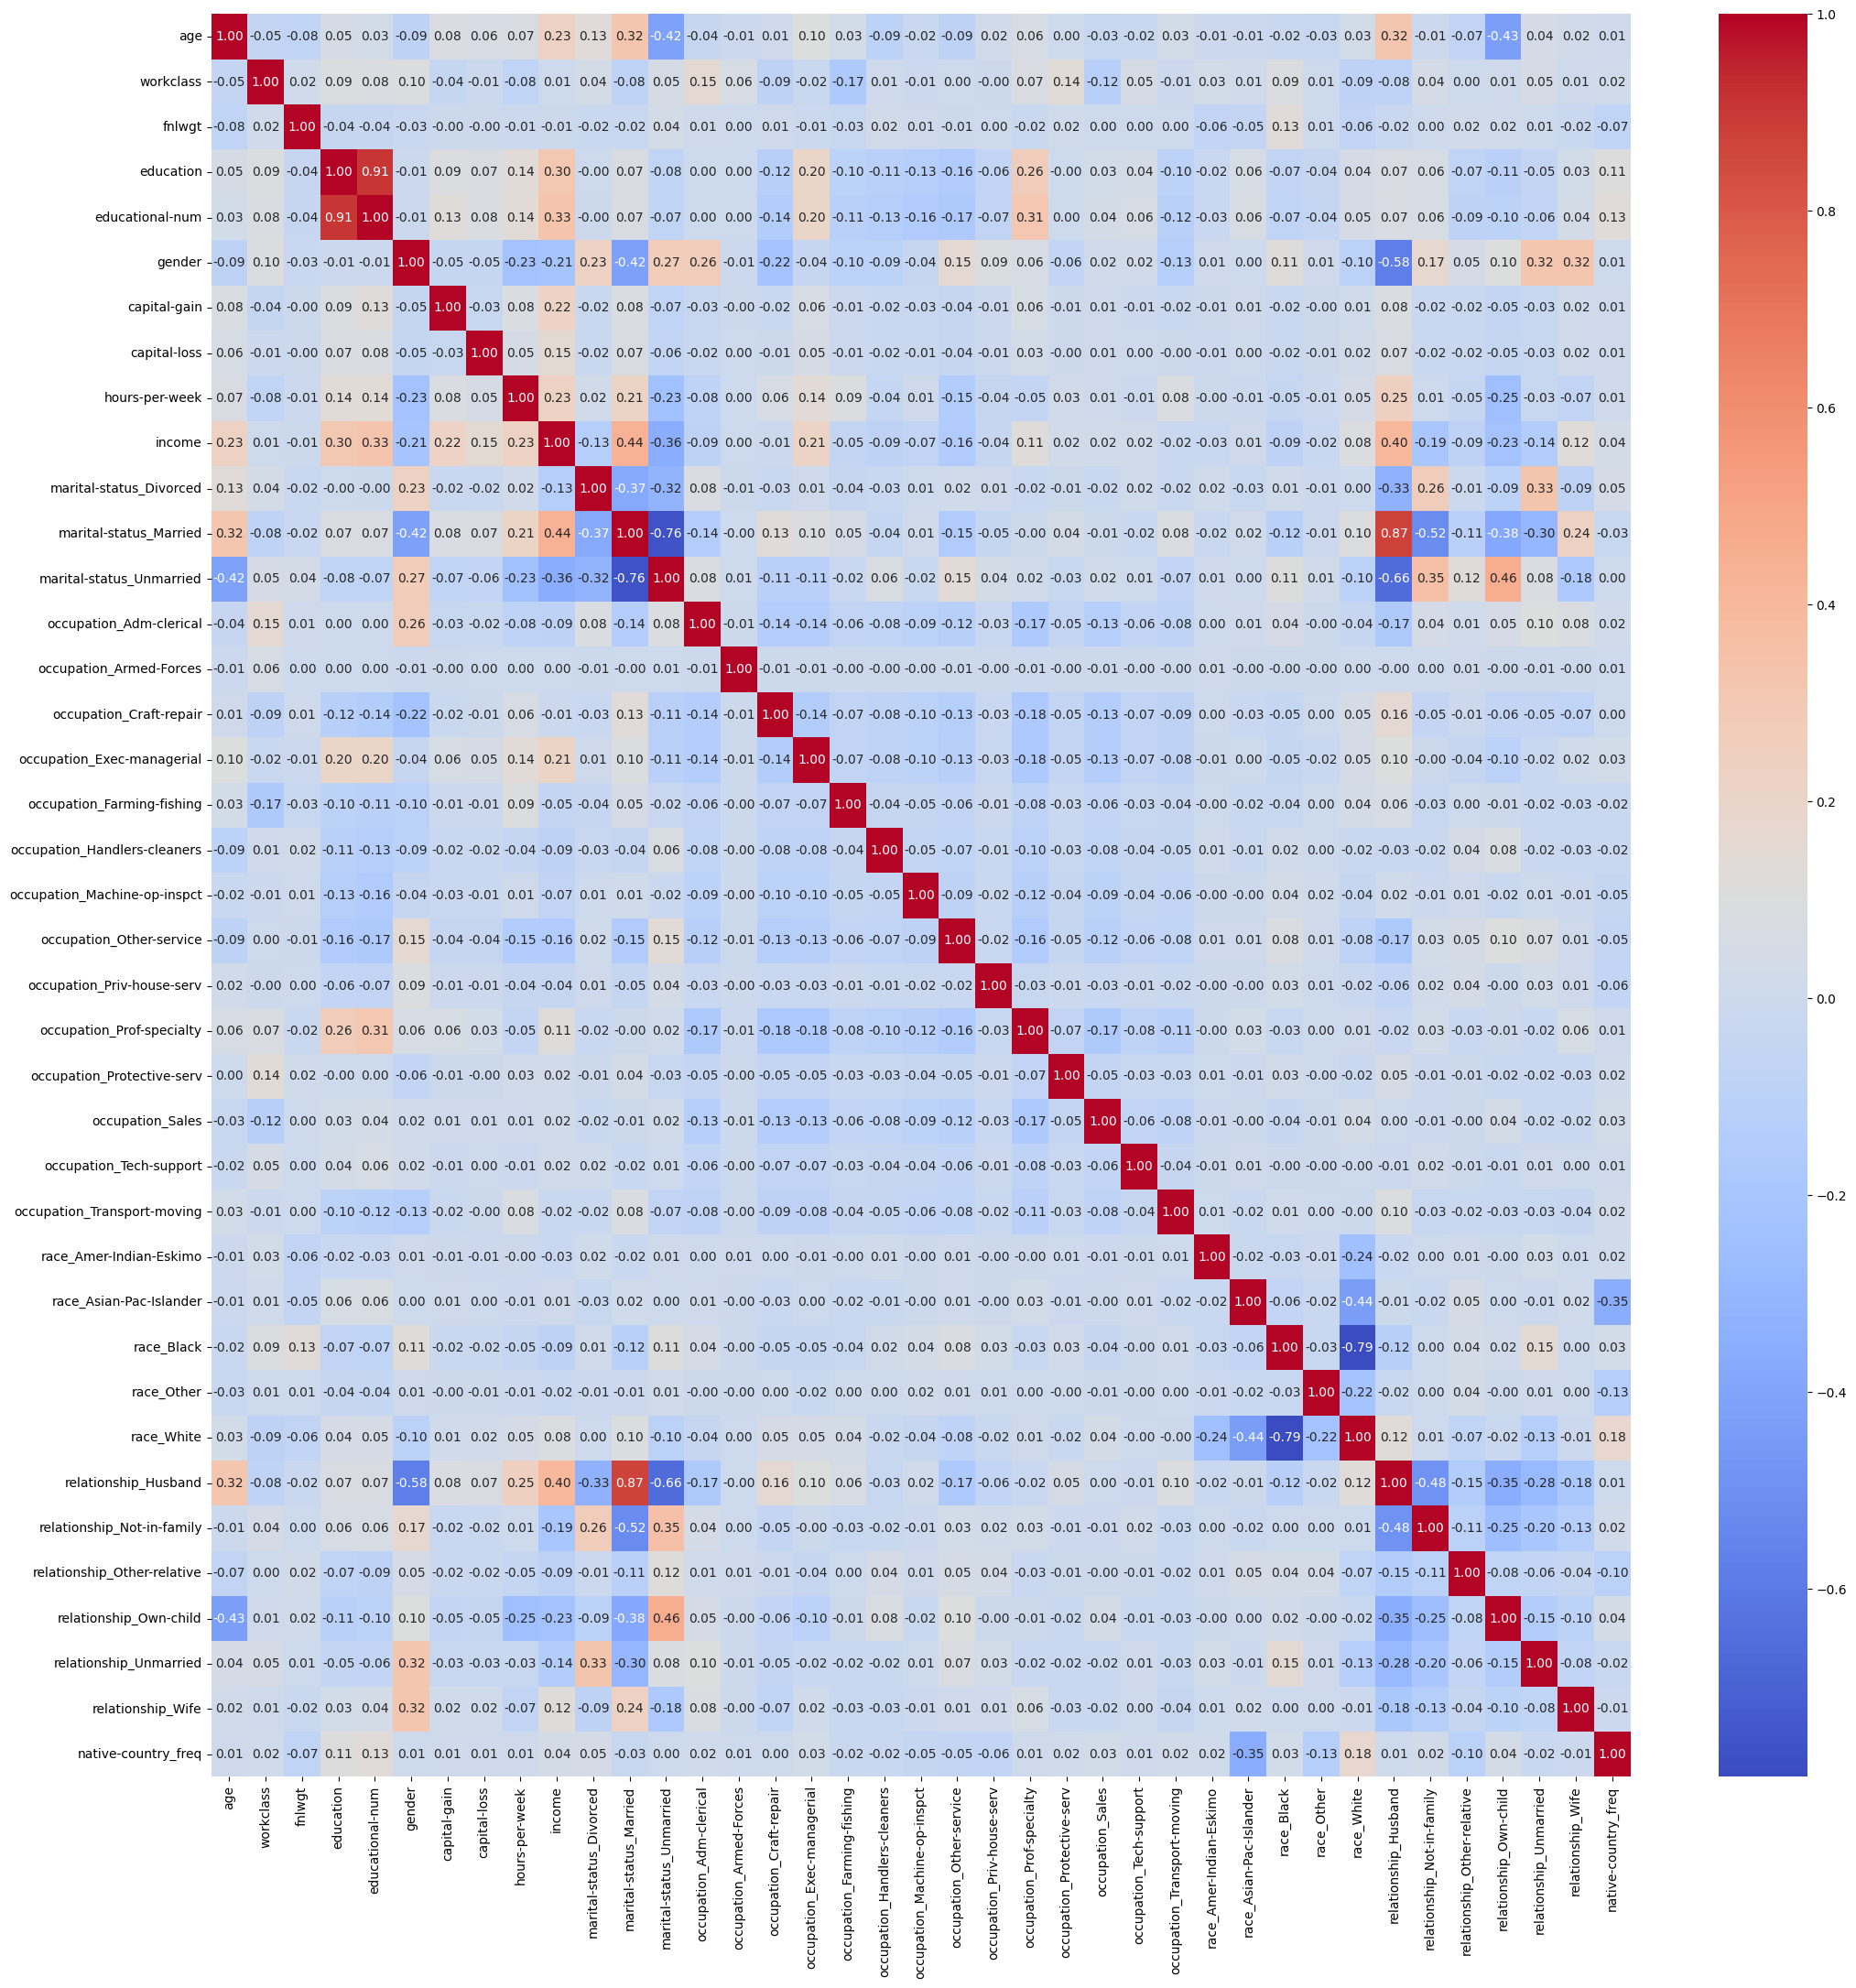

In [168]:
corr = encoded_df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

In [169]:
correlation = encoded_df.corr()['income'].drop('income')
correlation.sort_values(ascending=False)

,income
marital-status_Married,0.436624
relationship_Husband,0.403791
educational-num,0.332613
education,0.300486
age,0.230369
hours-per-week,0.227687
capital-gain,0.223013
occupation_Exec-managerial,0.210938
capital-loss,0.147554
relationship_Wife,0.120484


In [170]:
'''features = [
    'marital-status_Married-civ-spouse',
    'relationship_Husband',
    'relationship_Wife',
    'occupation_Exec-managerial',
    'occupation_Prof-specialty',
    'race_White',
    'occupation_Protective-serv',
    'occupation_Sales',
    'occupation_Tech-support',
    'race_Asian-Pac-Islander',
    'marital-status_Married-AF-spouse',
    'workclass',
    'occupation_Armed-Forces'
]

for col in features:
    sns.countplot(data=encoded_df, x=col, hue='income')
    plt.title(f'Income by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
'''

"features = [\n    'marital-status_Married-civ-spouse',\n    'relationship_Husband',\n    'relationship_Wife',\n    'occupation_Exec-managerial',\n    'occupation_Prof-specialty',\n    'race_White',\n    'occupation_Protective-serv',\n    'occupation_Sales',\n    'occupation_Tech-support',\n    'race_Asian-Pac-Islander',\n    'marital-status_Married-AF-spouse',\n    'workclass',\n    'occupation_Armed-Forces'\n]\n\nfor col in features:\n    sns.countplot(data=encoded_df, x=col, hue='income')\n    plt.title(f'Income by {col}')\n    plt.xticks(rotation=45)\n    plt.tight_layout()\n    plt.show()\n"

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

logistic_model = LogisticRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(logistic_model, x_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")


x_train_scaled = pd.DataFrame(x_train_scaled)
y_train = pd.Series(y_train)
fold = 1
for train_idx, val_idx in kf.split(x_train_scaled, y_train):
    logistic_model.fit(x_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    y_val_pred = logistic_model.predict(x_train_scaled.iloc[val_idx])
    print(f"\nFold {fold} Classification Report:")
    print(classification_report(y_train.iloc[val_idx], y_val_pred))
    fold += 1

logistic_model.fit(x_train_scaled, y_train)
y_pred = logistic_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy scores for each fold: [0.85083358 0.8477625  0.84820123 0.84761626 0.84657013]
Mean Accuracy: 0.8482
Standard Deviation: 0.0014

Fold 1 Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5192
           1       0.73      0.60      0.66      1646

    accuracy                           0.85      6838
   macro avg       0.81      0.76      0.78      6838
weighted avg       0.84      0.85      0.85      6838


Fold 2 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5177
           1       0.74      0.58      0.65      1661

    accuracy                           0.85      6838
   macro avg       0.81      0.76      0.78      6838
weighted avg       0.84      0.85      0.84      6838


Fold 3 Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5157
       

In [172]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(logistic_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

logistic_model.fit(x_train_scaled, y_train)

y_pred = logistic_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.84191284 0.84834747 0.85010237 0.84688505 0.85095802]
Mean Accuracy: 0.8476
Standard Deviation: 0.0032
Test Accuracy: 0.8556609568006551
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11233
           1       0.73      0.60      0.66      3420

    accuracy                           0.86     14653
   macro avg       0.81      0.77      0.78     14653
weighted avg       0.85      0.86      0.85     14653



In [173]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, x_train_scaled, y_train, cv=kf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.82392512 0.82290143 0.82392512 0.82772741 0.82740968]
Mean Accuracy: 0.8252
Standard Deviation: 0.0020
Test Accuracy: 0.8378489046611616
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11233
           1       0.67      0.60      0.63      3420

    accuracy                           0.84     14653
   macro avg       0.78      0.76      0.76     14653
weighted avg       0.83      0.84      0.83     14653



In [174]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.82538754 0.82553378 0.82319392 0.83006727 0.82697089]
Mean Accuracy: 0.8262
Standard Deviation: 0.0023
Test Accuracy: 0.8378489046611616
              precision    recall  f1-score   support

           0       0.88      0.91      0.90     11233
           1       0.67      0.60      0.63      3420

    accuracy                           0.84     14653
   macro avg       0.78      0.76      0.76     14653
weighted avg       0.83      0.84      0.83     14653



In [175]:
from sklearn.svm import SVC

svc_model = SVC(kernel='rbf', random_state=42)
skf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

svc_model.fit(x_train_scaled, y_train)

y_pred = svc_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.84849371 0.84732378 0.84907868 0.85054109 0.85168934]
Mean Accuracy: 0.8494
Standard Deviation: 0.0015
Test Accuracy: 0.8578448099365318
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11233
           1       0.75      0.59      0.66      3420

    accuracy                           0.86     14653
   macro avg       0.82      0.76      0.78     14653
weighted avg       0.85      0.86      0.85     14653



In [176]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(svc_model, x_train_scaled, y_train, cv=skf, scoring='accuracy')

print(f"Accuracy scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")

svc_model.fit(x_train_scaled, y_train)

y_pred = svc_model.predict(x_test_scaled)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy scores for each fold: [0.84834747 0.84820123 0.84980989 0.84907868 0.8490566 ]
Mean Accuracy: 0.8489
Standard Deviation: 0.0006
Test Accuracy: 0.8578448099365318
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11233
           1       0.75      0.59      0.66      3420

    accuracy                           0.86     14653
   macro avg       0.82      0.76      0.78     14653
weighted avg       0.85      0.86      0.85     14653

